# TOPIC: Analysis of Household Power Consumption in Gyalpozhing
## Group 6
1. Anisha Rai (12190041)
2. Rashmi Gurung (12190072)
3. Sonam Dema (12190081)
4. Tashi Namgay (12190086)

#1. IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt
plt.ioff()
from matplotlib import pyplot as plt


#2. LOAD DATA

In [2]:
#Load data

main_df = pd.read_excel('Gyalpozhing_household_power_consumption.XLSX')
main_df.head()

,BP Number,BP_name,CA_number,portion,posting_Date,Due Date,Billing Period,Print Doc. No.,Billing Doc. No.,consumption,...,current,voltage,energy_Charges,Demand Charges,Penalty Charges,Recon Key,G/L Account,Category,FICA Doument no,Search term1
0,1702371.0,Company Lemon Grass Factory Kurizampa,50000504.0,P17_41,2019-01-02,2019-02-01,2019/01,6.007099e+09,9.018221e+09,167.0,...,1.166136,234.0,589.51,0.0,0.00,19015R040045,300002,LV Agricultural,4.000049e+11,LEMON FACTORY
1,1705727.0,Company RBA Gyelposhing,50001004.0,P17_41,2019-01-02,2019-02-01,2019/01,4.003612e+09,9.018221e+09,788.0,...,5.502486,234.0,2781.64,0.0,0.00,190115R4/17,300002,LV Agricultural,9.434803e+07,"RAMS, GYELPOSHING"
2,1702588.0,N R D C Gyelposhing,60001500.0,P17_41,2019-01-02,2019-02-01,2019/01,6.007099e+09,9.018221e+09,0.0,...,0.000000,234.0,0.00,0.0,0.00,19015R040045,NaN,LV Bulk,4.000049e+11,N R D C
3,1702586.0,Swerage Treatment Plant,60000307.0,P17_41,2019-01-02,2019-02-01,2019/01,6.007099e+09,9.018221e+09,0.0,...,0.000000,234.0,0.00,0.0,0.00,19015R040045,NaN,LV Bulk,4.000049e+11,SWERAGE PLANT
4,1709983.0,Company Rabsel Construction Pvt.Ltd Gyelposhing,60006107.0,P17_41,2019-01-02,2019-02-01,2019/01,6.007099e+09,9.018221e+09,1880.0,...,13.127758,234.0,7557.60,0.0,463.18,19015R040045,300003,LV Bulk,4.000049e+11,RABSEL CONSTRUCTION


# 3. DATA PREPROCESSING 

In [3]:
# Creating a new dataframe with the only required attributes:

df = pd.DataFrame(main_df,columns=['Category','portion','posting_Date','current','voltage','consumption','energy_Charges'])
df.tail()

,Category,portion,posting_Date,current,voltage,consumption,energy_Charges
25377,LV Urban Domestic Customers,P17_40,2022-03-02,3.505391,234.0,502.0,1207.28
25378,MV Industrial,P17_41,2022-03-02,830.316742,234.0,118908.0,315106.20
25379,LV Bulk,P17_41,2022-03-16,0.000000,234.0,0.0,0.00
25380,NaN,NaN,NaT,NaN,NaN,NaN,NaN
25381,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [4]:
df.dtypes

Category                  object
portion                   object
posting_Date      datetime64[ns]
current                  float64
voltage                  float64
consumption              float64
energy_Charges           float64
dtype: object

In [5]:
# Selecting the data from 2019 till 2021 only:

df = df.loc[(df['posting_Date'] >= '01-01-2019') & (df['posting_Date'] < '01-01-2022')]
df.tail()

,Category,portion,posting_Date,current,voltage,consumption,energy_Charges
23602,LV Urban Domestic Customers,P17_41,2021-12-02,0.796045,234.0,114.0,165.52
23603,LV Urban Domestic Customers,P17_41,2021-12-02,1.529244,234.0,219.0,446.92
23604,LV Urban Domestic Customers,P17_41,2021-12-02,0.628457,234.0,90.0,115.20
23605,LV Urban Domestic Customers,P17_41,2021-12-02,0.733199,234.0,105.0,141.40
23606,LV Urban Domestic Customers,P17_41,2021-12-02,0.279314,234.0,40.0,51.20


In [6]:
# Extracting the year and montht from the posting_date
# Adding these two new columns(Year and month) and then droping the posting date col

df['Year'] = pd.to_datetime(df['posting_Date']).dt.year
df['Month'] = pd.to_datetime(df['posting_Date']).dt.month
df = df.drop(['posting_Date'], axis = 1)

In [7]:
df.duplicated().sum()

5952

In [8]:
gyalpozhing_df = df.drop_duplicates()

# 4. DETECTING OUTLIERS

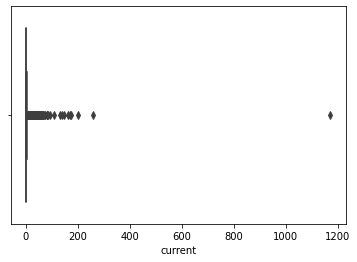

In [9]:
sns.boxplot(x = gyalpozhing_df['current'])
plt.show()

In [10]:
#ul = upper limit
#ll = lower limit
#IQR = Interquartile Range

q1 = gyalpozhing_df.current.quantile(0.25)
q3 = gyalpozhing_df.current.quantile(0.75)
IQR = q3 - q1
ul = q3 + (IQR * 1.5)
ll = q1 - (IQR * 1.5)

In [11]:
gyalpozhing_df[(gyalpozhing_df.current < ll)  | (gyalpozhing_df.current > ul)]

,Category,portion,current,voltage,consumption,energy_Charges,Year,Month
1,LV Agricultural,P17_41,5.502486,234.0,788.0,2781.64,2019,1
4,LV Bulk,P17_41,13.127758,234.0,1880.0,7557.60,2019,1
5,LV Bulk,P17_41,48.600637,234.0,6960.0,27979.20,2019,1
7,LV Bulk,P17_41,7.262164,234.0,1040.0,4180.80,2019,1
8,LV Bulk,P17_41,10.048321,234.0,1439.0,5784.78,2019,1
...,...,...,...,...,...,...,...,...
23469,LV Urban Domestic Customers,P17_41,11.668343,234.0,1671.0,5462.44,2021,12
23523,LV Urban Domestic Customers,P17_41,5.816714,234.0,833.0,2412.12,2021,12
23583,LV Urban Domestic Customers,P17_41,7.422770,234.0,1063.0,3249.32,2021,12
23584,LV Urban Domestic Customers,P17_41,8.100106,234.0,1160.0,3602.40,2021,12


In [12]:
df1 = gyalpozhing_df[(gyalpozhing_df.current > ll) & (gyalpozhing_df.current < ul)]
df1.shape

(16039, 8)

<function matplotlib.pyplot.show>

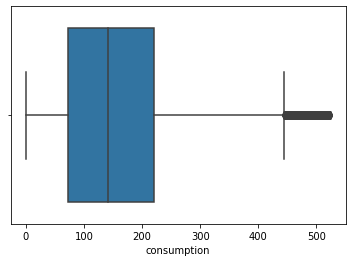

In [13]:
sns.boxplot(x = df1['consumption'])
plt.show

In [14]:
q1 = df1.consumption.quantile(0.25)
q3 = df1.consumption.quantile(0.75)
IQR = q3 - q1
ul = q3 + (IQR * 1.5)
ll = q1 - (IQR * 1.5)

In [15]:
df1[(df1.consumption < ll)  | (df1.consumption > ul)]

,Category,portion,current,voltage,consumption,energy_Charges,Year,Month
40,LV Commercial,P17_41,3.568236,234.0,511.0,1803.83,2019,1
52,LV Commercial,P17_41,3.456511,234.0,495.0,1747.35,2019,1
79,LV Institutional,P17_41,3.638065,234.0,521.0,1839.13,2019,1
81,LV Institutional,P17_41,3.631082,234.0,520.0,1835.60,2019,1
97,LV Institutional,P17_41,3.421597,234.0,490.0,1729.70,2019,1
...,...,...,...,...,...,...,...,...
23346,LV Urban Domestic Customers,P17_41,3.477459,234.0,498.0,1194.64,2021,12
23394,LV Urban Domestic Customers,P17_40,3.526339,234.0,505.0,1218.20,2021,12
23401,LV Urban Domestic Customers,P17_41,3.484442,234.0,499.0,1197.32,2021,12
23484,LV Urban Domestic Customers,P17_41,3.386682,234.0,485.0,1159.80,2021,12


In [16]:
df2 = df1[(df1.consumption > ll) & (df1.consumption < ul)]
df2.shape

(15663, 8)

<function matplotlib.pyplot.show>

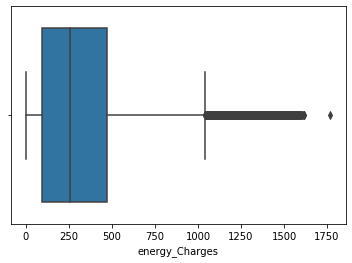

In [17]:
sns.boxplot(x = df2['energy_Charges'])
plt.show

In [18]:
q1 = df2.energy_Charges.quantile(0.25)
q3 = df2.energy_Charges.quantile(0.75)
IQR = q3 - q1
ul = q3 + (IQR * 1.5)
ll = q1 - (IQR * 1.5)

In [19]:
df2[(df2.energy_Charges < ll)  | (df2.energy_Charges > ul)]

,Category,portion,current,voltage,consumption,energy_Charges,Year,Month
15,LV Commercial,P17_41,3.037540,234.0,435.0,1535.55,2019,1
25,LV Commercial,P17_41,2.953746,234.0,423.0,1493.19,2019,1
31,LV Commercial,P17_41,2.918831,234.0,418.0,1475.54,2019,1
41,LV Commercial,P17_41,2.890900,234.0,414.0,1461.42,2019,1
45,LV Commercial,P17_41,2.800123,234.0,401.0,1415.53,2019,1
...,...,...,...,...,...,...,...,...
23150,LV Temporary,P17_41,2.234512,234.0,320.0,1164.80,2021,12
23151,LV Temporary,P17_41,2.667449,234.0,382.0,1390.48,2021,12
23154,LV Temporary,P17_41,2.430032,234.0,348.0,1266.72,2021,12
23163,LV Temporary,P17_41,3.100385,234.0,444.0,1616.16,2021,12


In [20]:
df3 = df2[(df2.energy_Charges > ll) & (df2.energy_Charges < ul)]
df3.shape

(15062, 8)

In [21]:
df3.dtypes

Category           object
portion            object
current           float64
voltage           float64
consumption       float64
energy_Charges    float64
Year                int64
Month               int64
dtype: object

# 7. TRAIN AND TEST SPLIT




In [22]:
# Input:
X = df3[['Year','Month','consumption','Category','portion']]

# Output:
y = df3['energy_Charges']

In [23]:
#SPLITING

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=3)

In [24]:
 #Pipeline is to create a sequence of preprocessing actions
from sklearn.pipeline import Pipeline

#SimpleImputer handles missing values
from sklearn.impute import SimpleImputer

#Standard Scaler normalise the numeric data so that large values does not
#create biasness in the training

#OneHotEndcoder converts categorical data to numerical, it also creates individual
#for each option in the categories
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

In [25]:
#Separate the Categorical and Numerical Columns
#Numeric columns
numeric_cols = X.select_dtypes(include=['int64','float64']).columns
print(numeric_cols)

#categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['Year', 'Month', 'consumption'], dtype='object')
Index(['Category', 'portion'], dtype='object')


In [26]:
numeric_index = [X.columns.get_loc(col) for col in numeric_cols]
numeric_index

[0, 1, 2]

In [27]:
categorical_index = [X.columns.get_loc(col) for col in categorical_cols]
categorical_index

[3, 4]

In [28]:
 #Building the Numeric Transformation Pipeline
numeric_transformer = Pipeline(steps = [
    ('imputer',SimpleImputer(strategy='mean')) #Handline numeric missing value with median
   ] )
#  ('scaler',StandardScaler()) #Normalize the data

In [29]:
#Building the Categorical Transformation Pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy = 'most_frequent',fill_value='missing')),
    ('onehot',OneHotEncoder(handle_unknown='ignore'))
])

In [30]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers = [('num',numeric_transformer,numeric_index),
                ('nominal',categorical_transformer,categorical_index),]
)

In [31]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor(n_estimators=200)

In [32]:
#Assemble the individual blocks to form the main pipeline
ecmodel = Pipeline(
    steps = [
      ('preprocessor', preprocessor), #Preprocessing
      ('regressor', RF_model)  #Model
    ]
)

In [33]:
ecmodel.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  [0, 1, 2]),
                                                 ('nominal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [3, 4])])),
                ('regressor', RandomForestRegressor(n_estimators=200))])

In [34]:
ecmodel.predict([[2021,7,216.0,11,0]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  "X does not have valid feature names, but"


array([457.6048])

In [35]:
import pickle
pickle.dump(ecmodel, open("ecmodel.sav","wb"))